# Objective mapping of one-dimensional data

Objective mapping is an useful tool for constructing gridded maps of oceanographic variables (*e.g.*, temperature, fluorescence, velocity, streamfunction) as continuous functions from discrete measurements that have random errors. For example, the random error in a measurement can be instrumental, associated with the precision of a thermistor or current meter.

## Theory

Suppose we want to map a scalar variable $D$ with measurements at $n$ sampling locations with coordinates $(x_n,y_n)$. But remember that what we measure is not the clean signal $D(x_n,y_n)$ of the variable. Our data vector $d$, with data values

\begin{equation*}
d_n = D(x_n,y_n) + \epsilon_n,
\end{equation*}

has random error with variance $\epsilon$. The objective map $\hat{D}$ is the best (minimum mean square error) linear estimate of the signal $D$:

\begin{equation*}
\hat{D}(x,y) = \mathbf{G}^T(x,y)\mathbf{d},
\end{equation*}

where $\mathbf{G}$ is the gain vector and $\mathbf{d}$ is the data vector. The entries in the gain vector are continuous functions of $x$ and $y$, and can be written as

\begin{equation}
\mathbf{G} = (\overline{\mathbf{dd}^T})^{-1}\overline{\mathbf{d}D(x,y)},
\end{equation}

where an overbar denotes an average over several sampling realizations.

To calculate the objective map $\hat{D}$ from the measurements $\mathbf{d}$, we only need information about the statistics of the data and the measurement error. Specifically, we need the autocovariance matrix of the data ($\mathbf{dd}^T$) and the variance $\epsilon$ of the random measurement error. 

Also, if we assume that

1. The error is normally-distributed;
2. The error is spatially uncorrelated with itself down to the smallest scale resolved by the measurements and
3. The error is **not** correlated with the signal,

then the data autocovariance matrix can be written in this simple form

\begin{equation*}
\overline{\mathbf{dd}^T} = \overline{\mathbf{DD}^T} + \epsilon\mathbf{I}.
\end{equation*}

Let's look at an example with 1D fake data to understand the problem.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from omtools import om1

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

Explain...

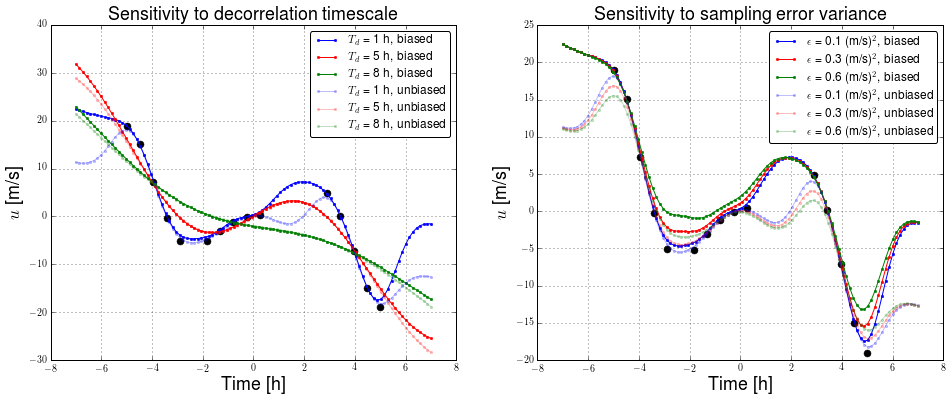

In [7]:
verbose = False

eps = 0.1
t = np.linspace(-5,5,20)

# Delete some random data points.
t = np.concatenate((t[:5], t[6:]))
t = np.concatenate((t[:10], t[14:]))

x = np.sin(t)*t**2 + t + np.random.randn(t.size)*eps
tc = np.linspace(-7, 7, 100)

xm01, em = om1(x, t, tc, Td=1., errvar=0.1, unbiased=False, verbose=verbose)
xm03, _ = om1(x, t, tc, Td=1., errvar=0.3, unbiased=False, verbose=verbose)
xm06, _ = om1(x, t, tc, Td=1., errvar=0.6, unbiased=False, verbose=verbose)

xm1s, _ = om1(x, t, tc, Td=1., errvar=0.1, unbiased=False, verbose=verbose)
xm5s, _ = om1(x, t, tc, Td=5., errvar=0.1, unbiased=False, verbose=verbose)
xm10s, _ = om1(x, t, tc, Td=8., errvar=0.1, unbiased=False, verbose=verbose)

# Unbiased maps.
xm01_unb, em_unb = om1(x, t, tc, Td=1., errvar=0.1, unbiased=True, verbose=verbose)
xm03_unb, _ = om1(x, t, tc, Td=1., errvar=0.3, unbiased=True, verbose=verbose)
xm06_unb, _ = om1(x, t, tc, Td=1., errvar=0.6, unbiased=True, verbose=verbose)

xm1s_unb, _ = om1(x, t, tc, Td=1., errvar=0.1, unbiased=True, verbose=verbose)
xm5s_unb, _ = om1(x, t, tc, Td=5., errvar=0.1, unbiased=True, verbose=verbose)
xm10s_unb, _ = om1(x, t, tc, Td=8., errvar=0.1, unbiased=True, verbose=verbose)

## Plotting.
fig, ax = plt.subplots(ncols=2, figsize=(16,6))
ax1, ax2 = ax
ax1.plot(t, x, 'ko', ms=7)
ax1.plot(tc, xm1s, 'b.', linestyle='solid', ms=5, label=r'$T_d$ = 1 h, biased')
ax1.plot(tc, xm5s, 'r.', linestyle='solid', ms=5, label=r'$T_d$ = 5 h, biased')
ax1.plot(tc, xm10s, 'g.', linestyle='solid', ms=5, label=r'$T_d$ = 8 h, biased')

ax1.plot(tc, xm1s_unb, 'b.', alpha=0.25, linestyle='solid', ms=5, label=r'$T_d$ = 1 h, unbiased')
ax1.plot(tc, xm5s_unb, 'r.', alpha=0.25, linestyle='solid', ms=5, label=r'$T_d$ = 5 h, unbiased')
ax1.plot(tc, xm10s_unb, 'g.', alpha=0.25, linestyle='solid', ms=5, label=r'$T_d$ = 8 h, unbiased')

ax1.set_xlabel(r'Time [h]', fontsize=18, fontweight='black')
ax1.set_ylabel(r'$u$ [m/s]', fontsize=18, fontweight='black')
ax1.set_title(r'Sensitivity to decorrelation timescale', fontsize=18, fontweight='black')
ax1.grid()
_ = ax1.legend(loc='best', fancybox=True, fontsize=12)

# Sensitivity to sampling error variance.
ax2.plot(t, x, 'ko', ms=7)
ax2.plot(tc, xm01, 'b.', linestyle='solid', ms=5, label=r'$\epsilon$ = 0.1 (m/s)$^2$, biased')
ax2.plot(tc, xm03, 'r.', linestyle='solid', ms=5, label=r'$\epsilon$ = 0.3 (m/s)$^2$, biased')
ax2.plot(tc, xm06, 'g.', linestyle='solid', ms=5, label=r'$\epsilon$ = 0.6 (m/s)$^2$, biased')

ax2.plot(tc, xm01_unb, 'b.', alpha=0.25, linestyle='solid', ms=5, label=r'$\epsilon$ = 0.1 (m/s)$^2$, unbiased')
ax2.plot(tc, xm03_unb, 'r.', alpha=0.25, linestyle='solid', ms=5, label=r'$\epsilon$ = 0.3 (m/s)$^2$, unbiased')
ax2.plot(tc, xm06_unb, 'g.', alpha=0.25, linestyle='solid', ms=5, label=r'$\epsilon$ = 0.6 (m/s)$^2$, unbiased')

ax2.set_xlabel(r'Time [h]', fontsize=18, fontweight='black')
ax2.set_ylabel(r'$u$ [m/s]', fontsize=18, fontweight='black')
ax2.set_title(r'Sensitivity to sampling error variance', fontsize=18, fontweight='black')
ax2.grid()
_ = ax2.legend(loc='best', fancybox=True, fontsize=12)

## **TODO**: Fix unbiased objective map error and add error plot here.

The error of the objective map is measured by the mean square difference between the map and the signal (normalized by the signal variance), *i.e.*,

\begin{equation*}
\text{NMSD} = \frac{\overline{(\hat{D} - D)^2}}{\overline{D^2}} = 1 - \frac{(\overline{D\mathbf{d}})^T(\overline{\mathbf{dd}^T})^{-1}\overline{\mathbf{d}D(x,y)}}{\overline{D^2}}.
\end{equation*}

Recall that this NMSD quantifies **how well the map estimates** the **_continuous_** distribution of the variable we are measuring at **_discrete_** points. The map-signal NMSD depends on our choices of

1. The model for the *autocovariance matrix* of the variable (we assumed it to be Gaussian);
2. The *decorrelation length* and
3. The variance of the *measurement* error.

## References

+ [Dan Rudnick's lecture notes on objective mapping](http://chowder.ucsd.edu/Rudnick/SIO_221B_files/objective_map.pdf) (*analysis of physical oceanographic data*, SIOC221B).
+ Bretherton *et al.* (1976). "A technique for objective analysis and design of oceanographic experiments applied to MODE-73." In Deep Sea Research and Oceanographic Abstracts, vol. 23, no. 7, pp. 559-582. Elsevier.